# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Baca data CSV
df = pd.read_csv("scrapped_Tiktok_EN.csv")  # Ganti dengan path file aslimu


In [3]:
df = df.dropna(subset=["content"])  # Hapus baris dengan content kosong
reviews = df["content"].astype(str)  # Konversi ke string

In [4]:
df["at"] = pd.to_datetime(df["at"])  # Ubah ke format tanggal
df_filtered = df[df["at"].dt.year == 2024]

df_filtered.shape


(18996, 11)

In [5]:
df = df_filtered.sample(n=6000, random_state=42)  # Ambil 6000 data 
df.score.value_counts()

score
1    2196
5    1892
3     672
4     633
2     607
Name: count, dtype: int64

In [6]:
from typing import List
import re


def tokenize(text: str) -> List[str]:
    # Remove punctuation using regex, keeping words and numbers
    cleaned_text = re.sub(r"[^\w\s]", "", text)
    # Split the cleaned text into words
    tokens = cleaned_text.lower().split()
    return tokens

In [7]:
df["tokens"] = df["content"].apply(tokenize)
df[["content", "tokens"]].head()  # Cek hasil tokenisasi

,content,tokens
2360,Why can't I put caption on my repost?!?!!,"[why, cant, i, put, caption, on, my, repost]"
9545,Sometimes I can't open it please fix it,"[sometimes, i, cant, open, it, please, fix, it]"
42,"I hate tiktok, When I want to create a new acc...","[i, hate, tiktok, when, i, want, to, create, a..."
3887,It has many bugs it's not worth it to install ...,"[it, has, many, bugs, its, not, worth, it, to,..."
3710,Earning coins while watching,"[earning, coins, while, watching]"


In [8]:
total_corpus = set(word for tokens in df["tokens"] for word in tokens)

word_count_list = []
for tokens in df["tokens"]:
    word_count = dict.fromkeys(total_corpus, 0)
    for word in tokens:
        word_count[word] += 1
    word_count_list.append(word_count)


In [9]:
# word_counts = []

# # Iterasi setiap review dalam dataset
# for tokens in df["tokens"]:
#     word_count = dict.fromkeys(total_corpus, 0)  # Inisialisasi semua kata dengan 0
#     for word in tokens:
#         word_count[word] += 1  # Hitung kemunculan kata dalam review
#     word_counts.append(word_count)

# # Konversi ke DataFrame
# freq_df = pd.DataFrame(word_counts)

# # Menampilkan semua baris (opsional, bisa menyebabkan output panjang)
# pd.set_option("display.max_rows", None)

# # Tampilkan DataFrame Transpose agar lebih mudah dibaca
# freq_df.T.head(5)


In [10]:
def compute_tf(tokens):
    word_counts = {word: 0 for word in tokens}  # Inisialisasi dictionary
    for word in tokens:
        word_counts[word] += 1  # Hitung jumlah kata

    total_words = len(tokens)  # Total kata dalam dokumen
    tf_dict = {word: count / total_words for word, count in word_counts.items()}  # Hitung TF
    return tf_dict


df["tf"] = df["tokens"].apply(compute_tf)  # Hitung TF untuk setiap review
df[["content", "tf"]]


,content,tf
2360,Why can't I put caption on my repost?!?!!,"{'why': 0.125, 'cant': 0.125, 'i': 0.125, 'put..."
9545,Sometimes I can't open it please fix it,"{'sometimes': 0.125, 'i': 0.125, 'cant': 0.125..."
42,"I hate tiktok, When I want to create a new acc...","{'i': 0.07462686567164178, 'hate': 0.014925373..."
3887,It has many bugs it's not worth it to install ...,"{'it': 0.125, 'has': 0.0625, 'many': 0.0625, '..."
3710,Earning coins while watching,"{'earning': 0.25, 'coins': 0.25, 'while': 0.25..."
...,...,...
6383,Very nice and good app 💯,"{'very': 0.2, 'nice': 0.2, 'and': 0.2, 'good':..."
944,t this past few days when i try to open tiktok...,"{'t': 0.013888888888888888, 'this': 0.02777777..."
11098,Tiktok kept violating my video even tho it's n...,"{'tiktok': 0.09090909090909091, 'kept': 0.0454..."
9840,I have to reinstall just to get into the app e...,"{'i': 0.09090909090909091, 'have': 0.090909090..."


In [11]:
# 5. Hitung Inverse Document Frequency (IDF)
def idf(word_counts):
    """Menghitung IDF berdasarkan jumlah dokumen yang mengandung kata tertentu"""
    N = len(word_counts)
    idf_dict = dict.fromkeys(word_counts[0].keys(), 0)

    for word in idf_dict.keys():
        idf_dict[word] = sum(1 for doc in word_counts if doc[word] > 0)

    for word, df in idf_dict.items():
        idf_dict[word] = np.log10((N + 1) / (df + 1))  # Rumus IDF

    return idf_dict

idfs = idf(word_count_list)

In [12]:
idfs

{'steak': 3.477193631102115,
 'synced': 3.477193631102115,
 'deserves': 3.176163635438134,
 'memorable': 3.176163635438134,
 'learnning': 3.477193631102115,
 'ready': 3.0792536224300777,
 'entantainment': 3.477193631102115,
 'brisket': 3.477193631102115,
 'mini': 3.477193631102115,
 'expect': 3.301102372046434,
 'patronize': 3.477193631102115,
 'list': 2.8239811173267717,
 'tiktokbecause': 3.477193631102115,
 'ohhh': 3.477193631102115,
 'scene': 3.176163635438134,
 'paylater': 3.176163635438134,
 'relationships': 3.477193631102115,
 'realy': 3.0792536224300777,
 'accurate': 3.0792536224300777,
 'ac': 3.477193631102115,
 'asthey': 3.477193631102115,
 'individuals': 3.477193631102115,
 'downloader': 3.477193631102115,
 'vanished': 3.301102372046434,
 'gallery': 2.4560043320321774,
 'businesses': 3.477193631102115,
 'enjoyand': 3.477193631102115,
 'playing': 2.380283618094059,
 'yup': 3.477193631102115,
 'funenjoying': 3.477193631102115,
 'interneti': 3.477193631102115,
 '1080p': 3.477193

In [13]:
# 6. Hitung TF-IDF
def tfidf(word_counts, idfs):
    """Menghitung TF-IDF"""
    tfidf_list = []
    for doc in word_counts:
        tfidf_dict = {word: doc[word] * idfs[word] for word in doc}
        tfidf_list.append(tfidf_dict)
    return tfidf_list

tfidf_values = tfidf(word_count_list, idfs)

In [14]:
# 7. Konversi ke DataFrame untuk Visualisasi
tfidf_df = pd.DataFrame(tfidf_values, index=df["reviewId"])
tfidf_df.head()  # Menampilkan hasil TF-IDF

,steak,synced,deserves,memorable,learnning,ready,entantainment,brisket,mini,expect,...,dancesing,karekare,disturbance,however,profile,loves,promi,kid,unflop,slight
reviewId,,,,,,,,,,,,,,,,,,,,,
aed8e7d9-f07c-4eb4-aaad-623e8749eaa3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a6ef5e66-de49-4a93-b98a-c66bc686bc9d,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2d33acbf-a885-441a-8a12-3d649a84c217,0.0,0.0,0.0,0.0,0.0,3.079254,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9167075e-8c4c-46c9-825d-3035bfea9117,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
762ea22c-531a-470b-be7f-91b218adfca6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
tfidf_df.describe()

,steak,synced,deserves,memorable,learnning,ready,entantainment,brisket,mini,expect,...,dancesing,karekare,disturbance,however,profile,loves,promi,kid,unflop,slight
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.000580,0.000580,0.001588,0.001588,0.000580,0.002053,0.000580,0.002318,0.000580,0.001100,...,0.000580,0.000580,0.000580,0.011122,0.016321,0.001588,0.000580,0.003354,0.001100,0.000580
std,0.044890,0.044890,0.071009,0.071009,0.044890,0.079486,0.044890,0.179562,0.044890,0.060265,...,0.044890,0.044890,0.044890,0.159604,0.211495,0.071009,0.044890,0.098155,0.060265,0.044890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.477194,3.477194,3.176164,3.176164,3.477194,3.079254,3.477194,13.908775,3.477194,3.301102,...,3.477194,3.477194,3.477194,2.301102,4.352327,3.176164,3.477194,2.875134,3.301102,3.477194


In [16]:
tfidf_df.sum(axis=1).sort_values(ascending=False).head(10)

reviewId
367c87c7-83eb-45db-a7e8-dae1871405b9    204.440934
108d42f4-92d4-4829-9f48-1a4406e4a368    177.767674
842a688b-6cd8-40de-a409-f05eaba794fb    174.902497
7dfed767-cb9e-412d-9c31-313f229522da    172.491927
84de2d04-331d-460c-bf3f-5fc614a956ed    164.765983
8d744c21-9b29-452f-9d96-0355d29b7fc0    160.590909
938081e7-0d19-46d6-af6d-d332ae85a4c2    159.958322
933bf97f-1759-4074-82e2-32f1eabdde3c    159.022751
f2176631-e000-4e93-a4a7-a3218b5fb6d3    157.384012
5d8e0b05-8df4-4eee-9a50-404b12de4955    157.023408
dtype: float64

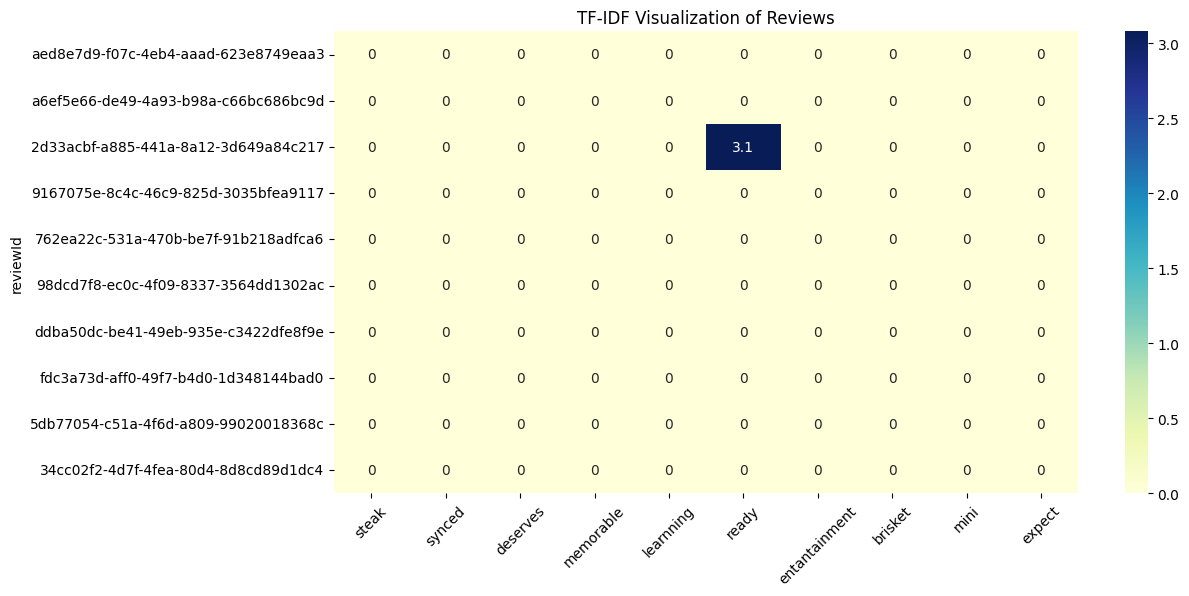

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(tfidf_df.iloc[:10, :10], cmap="YlGnBu", annot=True)
plt.xticks(rotation=45)
plt.title("TF-IDF Visualization of Reviews")
plt.show()